In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(784,256)
        self.h2 = nn.Linear(256,128)
        self.h3 = nn.Linear(128,64)
        self.out = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.h1(x)))
        x = self.dropout(F.relu(self.h2(x)))
        x = self.dropout(F.relu(self.h3(x)))
        x = F.log_softmax(self.out(x), dim=1)
        return x

In [4]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.003)

In [5]:
epochs = 25

train_losses, test_losses = [],[]

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        optimizer.zero_grad()
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                test_loss += criterion(log_ps, labels)
        model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
        
    print('Epoch: {}/{}, Train_loss: {}, Test_loss: {}, Accuracy: {}'.format(e+1,epochs,
                                                                            running_loss/len(trainloader),
                                                                            test_loss/len(testloader),
                                                                            accuracy*100/len(testloader)))        

Epoch: 1/25, Train_loss: 0.6613134741783142, Test_loss: 0.5069131255149841, Accuracy: 81.18033599853516
Epoch: 2/25, Train_loss: 0.5089235901832581, Test_loss: 0.4616154432296753, Accuracy: 82.8125
Epoch: 3/25, Train_loss: 0.4689335823059082, Test_loss: 0.4359976351261139, Accuracy: 84.13614654541016
Epoch: 4/25, Train_loss: 0.4450939893722534, Test_loss: 0.42454367876052856, Accuracy: 84.46456909179688
Epoch: 5/25, Train_loss: 0.42748525738716125, Test_loss: 0.4126768112182617, Accuracy: 85.10150909423828
Epoch: 6/25, Train_loss: 0.41317370533943176, Test_loss: 0.40323197841644287, Accuracy: 85.32046508789062
Epoch: 7/25, Train_loss: 0.4040673077106476, Test_loss: 0.39584967494010925, Accuracy: 85.66879272460938
Epoch: 8/25, Train_loss: 0.39343202114105225, Test_loss: 0.39051443338394165, Accuracy: 85.6588363647461
Epoch: 9/25, Train_loss: 0.38570284843444824, Test_loss: 0.38448530435562134, Accuracy: 85.98725891113281
Epoch: 10/25, Train_loss: 0.37980473041534424, Test_loss: 0.382829

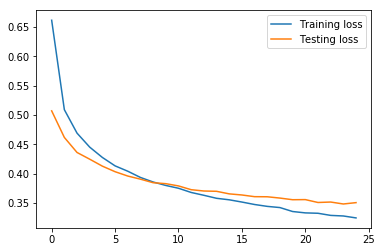

In [6]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()